In [1]:
from tensorflow.keras.applications import EfficientNetB0
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from keras import layers
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [2]:
model = EfficientNetB0(include_top=False, weights='imagenet')

16711680/16705208 [==============================] - 0s 0us/step


In [3]:
batch_size = 64
NUM_CLASSES = 13
IMG_SIZE = 224

In [4]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


In [5]:
model = build_model(num_classes=NUM_CLASSES)

datagen = ImageDataGenerator(rescale=1.0/255.0, samplewise_center=True, samplewise_std_normalization=True,
    rotation_range=20, zoom_range=0.15,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, brightness_range=[0.2,1.0],
    horizontal_flip=True, fill_mode="nearest")

train_it = datagen.flow_from_directory('../input/recaptcha-data/recaptcha_data/train/', target_size=(IMG_SIZE, IMG_SIZE), batch_size = batch_size)
val_it = datagen.flow_from_directory('../input/recaptcha-data/recaptcha_data/val', target_size=(IMG_SIZE, IMG_SIZE))

epochs = 100
history = model.fit(train_it, epochs=epochs, validation_data=val_it, verbose=2)

Found 16439 images belonging to 13 classes.
Found 4117 images belonging to 13 classes.
Epoch 1/100
257/257 - 434s - loss: 2.4971 - accuracy: 0.1933 - val_loss: 2.2129 - val_accuracy: 0.2876
Epoch 2/100
257/257 - 293s - loss: 2.2582 - accuracy: 0.2577 - val_loss: 2.1161 - val_accuracy: 0.2876
Epoch 3/100
257/257 - 297s - loss: 2.1988 - accuracy: 0.2645 - val_loss: 2.0815 - val_accuracy: 0.2847
Epoch 4/100
257/257 - 308s - loss: 2.1736 - accuracy: 0.2637 - val_loss: 2.0629 - val_accuracy: 0.2888
Epoch 5/100
257/257 - 313s - loss: 2.1587 - accuracy: 0.2680 - val_loss: 2.0539 - val_accuracy: 0.2881
Epoch 6/100
257/257 - 303s - loss: 2.1555 - accuracy: 0.2671 - val_loss: 2.0534 - val_accuracy: 0.2905
Epoch 7/100
257/257 - 301s - loss: 2.1373 - accuracy: 0.2696 - val_loss: 2.0508 - val_accuracy: 0.2895
Epoch 8/100
257/257 - 304s - loss: 2.1368 - accuracy: 0.2686 - val_loss: 2.0425 - val_accuracy: 0.2890
Epoch 9/100
257/257 - 305s - loss: 2.1239 - accuracy: 0.2728 - val_loss: 2.0405 - val_acc

In [6]:
preds = model.evaluate(val_it)

129/129 [==============================] - 58s 448ms/step - loss: 2.0116 - accuracy: 0.3121


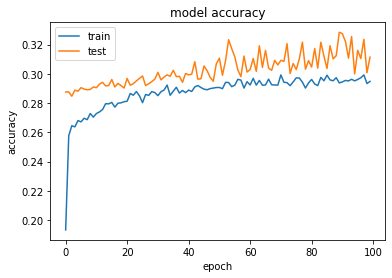

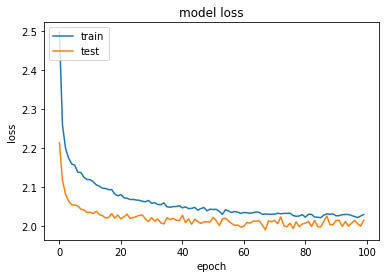

In [7]:
matplotlib.rcParams['figure.facecolor'] = '#ffffff'
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model.save('EfficientNetB0')